<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor


drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gws = sqlite3.connect('/content/drive/My Drive/FPL1.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
gws

,Name,Total Points,Game Week,ict_index,goals_scored,bps
0,Aaron Cresswell,0,1,0,0,0
1,Aaron Lennon,1,1,0.9,0,6
2,Aaron Ramsey,2,1,3,0,5
3,Abdoulaye DoucourÈ,0,1,0,0,0
4,Abdul Rahman Baba,0,1,0,0,0
...,...,...,...,...,...,...
67931,Yves Bissouma,2,114,2.4,0,7
67932,Zech Medley,0,114,0,0,0
67933,Zeze Steven Sessegnon,0,114,0,0,0
67934,¡lvaro Morata,0,114,0,0,0


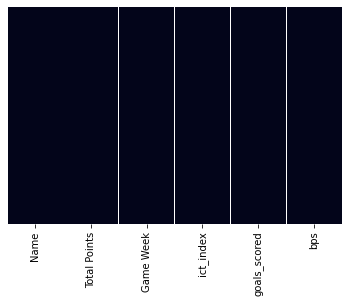

In [ ]:
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False)

In [ ]:
gws=gws.astype({'Total Points':int,'Game Week':int,'ict_index':float,'goals_scored':int,'bps':float})

In [ ]:
gws = gws.assign(id=(gws['Name']).astype('category').cat.codes)


In [ ]:
gws.head(50)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0
1,Aaron Lennon,1,1,0.9,0,6.0,1
2,Aaron Ramsey,2,1,3.0,0,5.0,4
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,9
4,Abdul Rahman Baba,0,1,0.0,0,0.0,10
5,Abel Hern·ndez,5,1,5.7,0,10.0,11
6,Adama Diomande,8,1,10.7,1,29.0,24
7,Adam Clayton,2,1,1.4,0,6.0,14
8,Adam Federici,0,1,0.0,0,0.0,15
9,Adam Forshaw,1,1,0.3,0,3.0,16


In [ ]:
gws1=gws.copy()

In [ ]:
#gws1['Total Points'].plot(kind='bar')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#x = gws1[['Total Points']].values.astype(float)
#scale = MinMaxScaler(feature_range=(0, 1) )

#scalerX = MinMaxScaler()
#scalery = MinMaxScaler()


#x_scaled = scale.fit(x)
#x_scaled=scale.transform(x)
#y = pd.DataFrame(x_scaled)


In [ ]:
#gws1['Points']=y
gws1.head()


,Name,Total Points,Game Week,ict_index,goals_scored,bps,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0
1,Aaron Lennon,1,1,0.9,0,6.0,1
2,Aaron Ramsey,2,1,3.0,0,5.0,4
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,9
4,Abdul Rahman Baba,0,1,0.0,0,0.0,10


In [ ]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift()
gws1['Last_1_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(1)
gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift()
gws1['Last_1_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(1)
gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift()
gws1['Last_1_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(1)
gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift()
gws1['Last_1_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(1)


gws1.head(600)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,id,Last_Week_Points,Last_1_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_Week_BPS,Last_1_Week_BPS
0,Aaron Cresswell,0,1,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsey,2,1,3.0,0,5.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman Baba,0,1,0.0,0,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Ben Gibson,6,2,2.0,0,20.0,124,2.0,2.0,0.0,0.0,1.7,1.7,6.0,6.0
596,Ben Hamer,0,2,0.0,0,0.0,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,Ben Hinchcliffe,0,2,0.0,0,0.0,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,Ben Mee,6,2,4.1,0,27.0,128,2.0,2.0,0.0,0.0,2.3,2.3,15.0,15.0


In [ ]:
gws1['Last_Week_Diff_Points'] = gws1.groupby(['id'])['Last_Week_Points'].diff()
gws1['Last_1_Week_Diff_Points'] = gws1.groupby(['id'])['Last_1_Week_Points'].diff()
gws1['Last_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_Week_Goals'].diff()
gws1['Last_1_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_1_Week_Goals'].diff()
gws1['Last_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_Week_ICT'].diff()
gws1['Last_Week_1_Diff_ICT'] = gws1.groupby(['id'])['Last_1_Week_ICT'].diff()
gws1['Last_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_Week_BPS'].diff()
gws1['Last_Week_1_Diff_BPS'] = gws1.groupby(['id'])['Last_1_Week_BPS'].diff()






In [ ]:
gws1.head()

,Name,Total Points,Game Week,ict_index,goals_scored,bps,id,Last_Week_Points,Last_1_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_Week_Diff_Points,Last_1_Week_Diff_Points,Last_Week_Diff_Goals,Last_1_Week_Diff_Goals,Last_Week_Diff_ICT,Last_Week_1_Diff_ICT,Last_Week_Diff_BPS,Last_Week_1_Diff_BPS
0,Aaron Cresswell,0,1,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsey,2,1,3.0,0,5.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman Baba,0,1,0.0,0,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gws1=gws1.dropna()
#gws1.drop('Total Points',axis=1, inplace=True)


In [ ]:
gws1.head()


,Name,Total Points,Game Week,ict_index,goals_scored,bps,id,Last_Week_Points,Last_1_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_Week_Diff_Points,Last_1_Week_Diff_Points,Last_Week_Diff_Goals,Last_1_Week_Diff_Goals,Last_Week_Diff_ICT,Last_Week_1_Diff_ICT,Last_Week_Diff_BPS,Last_Week_1_Diff_BPS
1122,Aaron Cresswell,2,3,2.0,0,13.0,0,1.0,1.0,0.0,0.0,1.3,1.3,12.0,12.0,1.0,1.0,0.0,0.0,1.3,1.3,12.0,12.0
1123,Aaron Lennon,1,3,0.7,0,6.0,1,1.0,1.0,0.0,0.0,0.4,0.4,6.0,6.0,0.0,0.0,0.0,0.0,-0.5,-0.5,0.0,0.0
1124,Aaron Ramsey,1,3,0.5,0,2.0,4,4.0,4.0,0.0,0.0,4.8,4.8,13.0,13.0,2.0,2.0,0.0,0.0,1.8,1.8,8.0,8.0
1125,Abdoulaye DoucourÈ,0,3,0.0,0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126,Abdul Rahman Baba,0,3,0.0,0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#def rmsle(real, predicted):
 # sum=0.0
  #for x in range(len(predicted)):
   #     p = np.log(predicted[x]+1)
    #    r = np.log(real[x]+1)
     #   sum = sum + (p - r)**2
  #return (sum/len(predicted))**0.5
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))


In [ ]:
#mean_error = []
#for game_week in range(107,114):
 #   train = gws1[gws1['Game Week'] <  game_week]
  #  val = gws1[gws1['Game Week'] == game_week]

   # p = val['Last_Week_Points'].values
    #error = rmsle(val['Points'].values, p)
    #print('Game Week %d - Error %.2f' % (game_week, error))
    #mean_error.append(error)
#print('Mean Error = %.2f' % np.mean(mean_error))


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
from statsmodels.tsa.vector_ar.var_model import VAR

mean_error = []
for week in range(114,115):
  train = gws1[gws1['Game Week'] < week]
  val = gws1[gws1['Game Week'] == week]

  xtr, xts = train.drop(['Total Points','Name'], axis=1), val.drop(['Total Points','Name'], axis=1)
  ytr, yts = train['Total Points'].values, val['Total Points'].values

  mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42,)
  mdl.fit(xtr, ytr)
  #mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
  #mdl.fit(xtr, np.log1p(ytr))
  #mdl=VAR(endog=train)
  #mdl.fit()
  

  p=mdl.predict(xts)
  print('MAE:',mean_absolute_error(yts,p))
  print('MSE:',mean_squared_error(yts,p))
  print('RMSE',np.sqrt(mean_squared_error(yts,p)))
  print('R2 Score',r2_score(yts,p))
  #error = rmsle(yts, p)
  #print('Week %d - Error %.5f' % (week, error))
  #mean_error.append(error)
#print('Mean Error = %.5f' % np.mean(mean_error))


ValueError: ignored

In [ ]:
train

,Name,Total Points,Game Week,ict_index,goals_scored,bps,id,Last_Week_Points,Last_1_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_Week_Diff_Points,Last_1_Week_Diff_Points,Last_Week_Diff_Goals,Last_1_Week_Diff_Goals,Last_Week_Diff_ICT,Last_Week_1_Diff_ICT,Last_Week_Diff_BPS,Last_Week_1_Diff_BPS
1122,Aaron Cresswell,2,3,2.0,0,13.0,0,1.0,1.0,0.0,0.0,1.3,1.3,12.0,12.0,1.0,1.0,0.0,0.0,1.3,1.3,12.0,12.0
1123,Aaron Lennon,1,3,0.7,0,6.0,1,1.0,1.0,0.0,0.0,0.4,0.4,6.0,6.0,0.0,0.0,0.0,0.0,-0.5,-0.5,0.0,0.0
1124,Aaron Ramsey,1,3,0.5,0,2.0,4,4.0,4.0,0.0,0.0,4.8,4.8,13.0,13.0,2.0,2.0,0.0,0.0,1.8,1.8,8.0,8.0
1125,Abdoulaye DoucourÈ,0,3,0.0,0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126,Abdul Rahman Baba,0,3,0.0,0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67307,Yves Bissouma,2,113,5.7,0,11.0,1084,0.0,0.0,0.0,0.0,1.3,1.3,-1.0,-1.0,-3.0,-3.0,0.0,0.0,-0.7,-0.7,-13.0,-13.0
67308,Zech Medley,0,113,0.0,0,0.0,1086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67309,Zeze Steven Sessegnon,0,113,0.0,0,0.0,1087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67310,¡lvaro Morata,0,113,0.0,0,0.0,1090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=pd.DataFrame({'Actual':yts,'Predicted':p, 'Week':week})
df

,Actual,Predicted,Week
0,0,0.067,114
1,0,0.000,114
2,2,2.152,114
3,0,0.000,114
4,0,0.000,114
...,...,...,...
613,2,1.791,114
614,0,0.000,114
615,0,0.000,114
616,0,0.000,114


<Figure size 1440x1440 with 0 Axes>

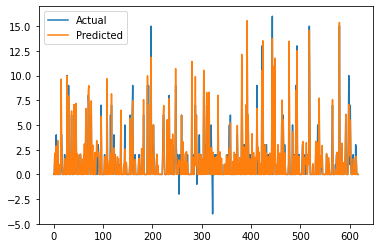

In [ ]:
#y=scale.inverse_transform([yts])
#df = pd.DataFrame({'Actual': y, 'Predicted': p},index=gws1['id'])
#df
#p_orig=pd.DataFrame(scale.inverse_transform([p])).transpose()
df=pd.DataFrame({'Actual':yts,'Predicted':p})
plt.figure(figsize=(20,20))
df.plot()


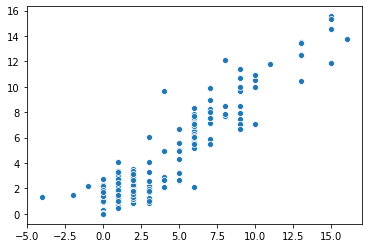

In [ ]:
sns.scatterplot(yts,p)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
print('MAE:',mean_absolute_error(yts,p))
print('MSE:',mean_squared_error(yts,p))
print('RMSE',np.sqrt(mean_squared_error(yts,p)))
print('R2 Score',r2_score(yts,p))

MAE: 0.37309223300970873
MSE: 0.667711354368932
RMSE 0.8171360684542888
R2 Score 0.904692411418299


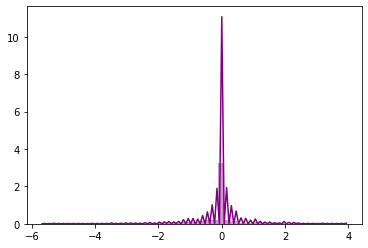

In [ ]:
sns.distplot(yts-p,color='purple')

In [ ]:
a=pd.read_csv("/content/drive/My Drive/test.csv")

In [ ]:
a = a.assign(id=(a['Name']).astype('category').cat.codes)
a.head()

,Name,Total Points,Game Week,ict_index,goals_scored,bps,id
0,Aaron Cresswell,NaN,115,NaN,NaN,NaN,0
1,Aaron Lennon,NaN,115,NaN,NaN,NaN,1
2,Aaron Mooy,NaN,115,NaN,NaN,NaN,2
3,Aaron Ramsdale,NaN,115,NaN,NaN,NaN,3
4,Aaron Wan-Bissaka,NaN,115,NaN,NaN,NaN,4


In [ ]:
#c=pd.DataFrame(np.nan_to_num(a),columns=a.columns)
#c

,Name,Total Points,Game Week,ict_index,goals_scored,bps
0,Aaron Cresswell,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,NaN,NaN,NaN,NaN,NaN
2,Aaron Mooy,NaN,NaN,NaN,NaN,NaN
3,Aaron Ramsdale,NaN,NaN,NaN,NaN,NaN
4,Aaron Wan-Bissaka,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
521,Yoshinori Muto,NaN,NaN,NaN,NaN,NaN
522,Youri Tielemans,NaN,NaN,NaN,NaN,NaN
523,Yves Bissouma,NaN,NaN,NaN,NaN,NaN
524,√áaglar S√∂y√ºnc√º,NaN,NaN,NaN,NaN,NaN


In [ ]:
a['Last_Week_Points'] = a.groupby(['id'])['Total Points'].shift()
a['Last_1_Week_Points'] = a.groupby(['id'])['Total Points'].shift(1)
a['Last_Week_Goals'] = a.groupby(['id'])['goals_scored'].shift()
a['Last_1_Week_Goals'] = a.groupby(['id'])['goals_scored'].shift(1)
a['Last_Week_ICT'] = a.groupby(['id'])['ict_index'].shift()
a['Last_1_Week_ICT'] = a.groupby(['id'])['ict_index'].shift(1)
a['Last_Week_BPS'] = a.groupby(['id'])['bps'].shift()
a['Last_1_Week_BPS'] = a.groupby(['id'])['bps'].shift(1)
a['Last_Week_Diff_Points'] = a.groupby(['id'])['Last_Week_Points'].diff()
a['Last_1_Week_Diff_Points'] = a.groupby(['id'])['Last_1_Week_Points'].diff()
a['Last_Week_Diff_Goals'] = a.groupby(['id'])['Last_Week_Goals'].diff()
a['Last_1_Week_Diff_Goals'] = a.groupby(['id'])['Last_1_Week_Goals'].diff()
a['Last_Week_Diff_ICT'] = a.groupby(['id'])['Last_Week_ICT'].diff()
a['Last_Week_1_Diff_ICT'] = a.groupby(['id'])['Last_1_Week_ICT'].diff()
a['Last_Week_Diff_BPS'] = a.groupby(['id'])['Last_Week_BPS'].diff()
a['Last_Week_1_Diff_BPS'] = a.groupby(['id'])['Last_1_Week_BPS'].diff()
#c=a.drop('Name',axis=1)
c=a
c.head()
#b=mdl.predict(c)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,id,Last_Week_Points,Last_1_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_Week_Diff_Points,Last_1_Week_Diff_Points,Last_Week_Diff_Goals,Last_1_Week_Diff_Goals,Last_Week_Diff_ICT,Last_Week_1_Diff_ICT,Last_Week_Diff_BPS,Last_Week_1_Diff_BPS
0,Aaron Cresswell,NaN,115,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,NaN,115,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Mooy,NaN,115,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aaron Ramsdale,NaN,115,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aaron Wan-Bissaka,NaN,115,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
c.replace(np.NaN,0, inplace=True)
c

,Name,Total Points,Game Week,ict_index,goals_scored,bps,id,Last_Week_Points,Last_1_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_Week_Diff_Points,Last_1_Week_Diff_Points,Last_Week_Diff_Goals,Last_1_Week_Diff_Goals,Last_Week_Diff_ICT,Last_Week_1_Diff_ICT,Last_Week_Diff_BPS,Last_Week_1_Diff_BPS
0,Aaron Cresswell,0.0,115,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aaron Lennon,0.0,115,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aaron Mooy,0.0,115,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aaron Ramsdale,0.0,115,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Wan-Bissaka,0.0,115,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Yoshinori Muto,0.0,115,0.0,0.0,0.0,521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,Youri Tielemans,0.0,115,0.0,0.0,0.0,522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,Yves Bissouma,0.0,115,0.0,0.0,0.0,523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,√áaglar S√∂y√ºnc√º,0.0,115,0.0,0.0,0.0,524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
b=pd.DataFrame(mdl.predict(c.drop(['Name','Total Points'],axis=1)))

In [ ]:
b

,0
0,0.067
1,0.000
2,0.000
3,0.000
4,0.000
...,...
521,0.000
522,0.000
523,0.000
524,0.000
